## Projeto de Parceria - *EBAC*

### Introdução

O projeto surge da seguinte afirmação: "Encontrar uma problemática da vida real que possa ser solucionada através de análise de dados e machine learning. A ideia do projeto é explanar e justificar a relevância do uso de dados para descobrir a solução."

Pensando em como justificar a relevância do uso de dados, fiz algumas pesquisas e encontrei uma problemática que através do uso dos dados, pode trazer uma agilidade necessária para salvar vidas, explico melhor abaixo, onde apresento a coleta de dados.

## Coleta de dados

A Universidade da Califórnia Irvine possui um repositório de Machine Learning contendo alguns datasets de livre acesso para treinamento e estudo. Dentre estes, encontrei um que pode ser utilizado para apresentar meus argumentos em favor da relevância da cultura "data driven" na busca por soluções práticas.

O dataset em questão contém dados sobre pacientes na cidade de Cleveland, onde as variáveis que são dados sobre a saúde dos pacientes, atentam para a possibilidade de doenças coronárias. Os dados são de 1988.

Deixo aqui também o link da fonte. [https://archive.ics.uci.edu/dataset/45/heart+disease]

Para reforçar meu argumento, deixo aqui também um link contendo algumas das citações de um artigo escrito em 1989 propondo o uso de algoritmos para facilitar o diagnóstico de doenças coronárias. [https://www.semanticscholar.org/paper/International-application-of-a-new-probability-for-Detrano-J%C3%A1nosi/a7d714f8f87bfc41351eb5ae1e5472f0ebbe0574]

A presença de inúmeros artigos científicos dentro da medicina é também um forte indício do poder que o uso de um algoritmo bem treinado tem sobre a agilidade de diagnóstico e tratamento de pacientes. 

Mas vamos partir para a tratativa dos dados e a organização de um modelo de predição treinado com os dados do dataset.

## Modelo Preditivo

### Tratamento dos dados

In [93]:
# Importar bibliotecas e arquivos

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz


df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/heart-disease-cleveland.csv')

In [94]:
# Tratamento dos dados

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [95]:
# Separação dos dados

y = df[' diagnosis']
x = df.drop(" diagnosis", axis=1)

# Treino

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=50)

### Regressão Linear

In [96]:
# Construção do modelo

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

LinearRegression()

In [97]:
# Preparação para predição

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [98]:
# Análise de acurária e performance do modelo

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

# Criação de um dataframe contendo as métricas (facilitar visualização)

lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.699618,0.541187,0.613603,0.591056


### Floresta Aleatória

In [99]:
# Utilizando outro modelo

rf = RandomForestClassifier(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=100)

In [100]:
# Treinando modelo de Floresta Aleatória

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [101]:
# Organizando modelos em avaliação

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

#Colocando ambos os resultados no dataframe
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.699618,0.541187,0.613603,0.591056
1,Random forest,1.5,0.016293,1.545455,-0.029988


### Árvore de Decisão

In [102]:
# Utilizando outro modelo

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_dt_train_pred = dt_model.predict(x_train)
y_dt_test_pred = dt_model.predict(x_test)

# Cálculo de métricas

dt_train_mse = mean_squared_error(y_train, y_dt_train_pred)
dt_train_r2 = r2_score(y_train, y_dt_train_pred)
dt_test_mse = mean_squared_error(y_test, y_dt_test_pred)
dt_test_r2 = r2_score(y_test, y_dt_test_pred)

# Concatenando resultados

dt_results = pd.DataFrame(['Decision Tree', dt_train_mse, dt_train_r2, dt_test_mse, dt_test_r2]).transpose()
dt_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
df_models = pd.concat([df_models, dt_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.699618,0.541187,0.613603,0.591056
1,Random forest,1.5,0.016293,1.545455,-0.029988
2,Decision Tree,0.0,1.0,1.626263,-0.083843


### Visualização dos dados

Text(0.5, 0, 'Experimental LogS')

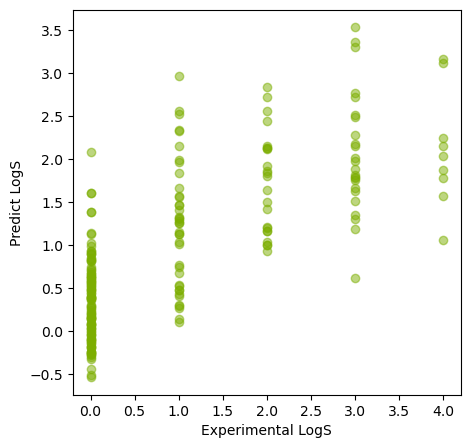

In [106]:
# Visualização da distribuição dos dados

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.5)

plt.ylabel('Predict LogS')
plt.xlabel('Experimental LogS')

### Teste

In [107]:
# Apresentação do cabeçalho de modo a facilitar a ordenação manual da array seguinte

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [108]:
# Organização da array com os dados de um paciente aleatório, bem como utilização do modelo treinado para predição do risco de doença coronária

new_p = np.array([60, 1, 4, 120, 250, 0, 2, 150, 1, 2.0, 2, 0.0, 4.0])
# Predição junto da apresentação do primeiro valor da array, acessado pelo indice 0

c_d = model.predict(new_p.reshape(1, -1))
predicted_pacient = c_d[0]
print(f'O grau de risco para doença coronária do paciente é {predicted_pacient}')

O grau de risco para doença coronária do paciente é 0


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Conclusão

A utilização de modelos de predição visando agilizar e automatizar processos representa um grande ganho quando se trata de pacientes de doenças graves, onde o tempo é tão importante. Aqui organizei um modelo de predição com muitas variáveis categóricas, onde a variável resposta era ordinal. Um bom exercício, onde tentei apresentar alguns modelos diferentes, para avaliar como cada um deles lida com os tipos de variáveis. Que este projeto seja de valia para minha evolução enquanto profissional da área de dados.